# Quantum Teleportation

In [1]:
import qiskit as qs
import numpy as np
import matplotlib as mpl

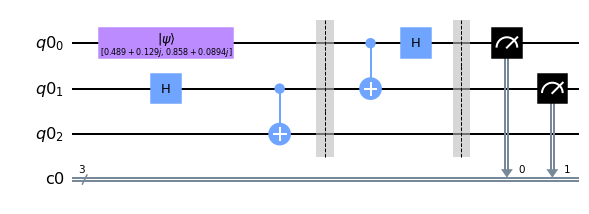

In [2]:
unknown_qubit = qs.quantum_info.random_statevector(dims=2, seed=0)

q = qs.QuantumRegister(3)
c = qs.ClassicalRegister(3)
qc = qs.QuantumCircuit(q, c)

# q0 is initialised with a random unknown qubit
qc.initialize(unknown_qubit.data, q[0])

# prepare entanglement in q1 and q2 shared by Alice and Bob
qc.h(q[1])
qc.cx(q[1], q[2])

qc.barrier()

# operations perfomed by Alice on her qubit and the random qubit to be teleported
qc.cx(q[0], q[1])
qc.h(q[0])

qc.barrier()

# Alice performs measumerent of q0 and q1 and communicates the classical bits over to Bob
qc.measure(q[0:2], c[0:2])
qc.draw(output='mpl')

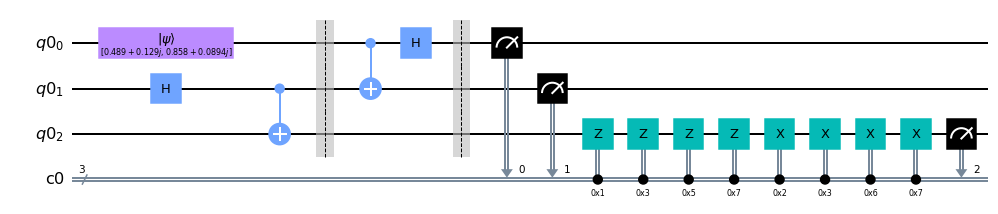

In [3]:
# Bob performs operations on his qubit depending on the bits of information received

# c[0] is 1 whenever c is 001, 011, 101, 111 i.e. 1, 3, 5, 7
qc.z(q[2]).c_if(c, 1)
qc.z(q[2]).c_if(c, 3)
qc.z(q[2]).c_if(c, 5)
qc.z(q[2]).c_if(c, 7)

# c[1] is 1 whenever c is 010, 011, 110, 111 i.e. 2, 3, 6, 7
qc.x(q[2]).c_if(c, 2)
qc.x(q[2]).c_if(c, 3)
qc.x(q[2]).c_if(c, 6)
qc.x(q[2]).c_if(c, 7)

# Bob's qubit is measured to confirm the results
qc.measure(q[2], c[2])
qc.draw(output='mpl')

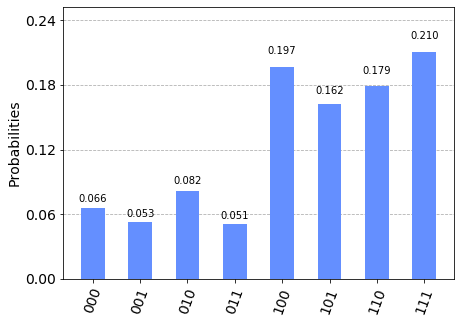

In [4]:
# execute the circuit on a qasm simulator
backend = qs.Aer.get_backend('qasm_simulator')
job = qs.execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
graph = qs.visualization.plot_histogram(counts)
display(graph)

# Adding up all probabilites where q2 = 0 will give |coeffient of |0> of unknown qubit|^2
# Adding up all probabilites where q2 = 1 will give |coeffient of |1> of unknown qubit|^2